<a href="https://colab.research.google.com/github/FatimaSeemab/Counter-with-Mosh/blob/main/Copy_of_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Started

In [ ]:
!nvidia-smi

Sun Jan 29 13:28:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

ValueError: ignored

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
!pip install ultralytics==8.0.20 

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/cricket3.jpg' save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/engine/model.py", line 146, in predict
    return self.predictor(source=source, stream=stream, verbose=verbose)
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/engine/predictor.py", line 158, in 

In [ ]:
from ultralytics_yolo.models import YOLOv8

model = YOLOv8(weights='path_to_custom_model_weights')

ModuleNotFoundError: ignored

/content


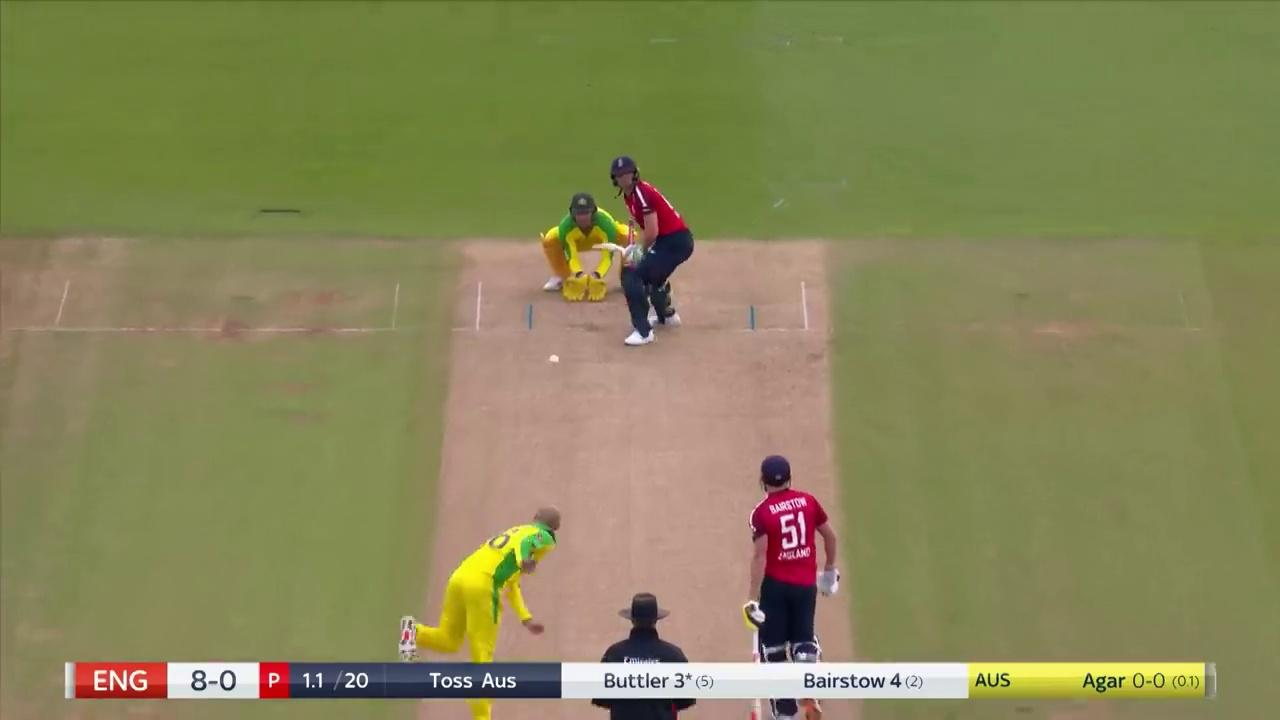

In [ ]:
%cd {HOME}
Image(filename='/content/cricket3.jpg', height=600)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="6pOot7erTYP3BM5zP2J1")
project = rf.workspace("lala-2olc2").project("psl-dataset")
dataset = project.version(2).download("yolov5")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PSL-DATASET-2 in yolov5pytorch:: 100%|██████████| 2778/2778 [00:01<00:00, 2549.39it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:03<00:00, 7.23MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/PSL-DATASET-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch915.jpg
events.out.tfevents.1674967530.6536eb7d0eb2.2721.0  train_batch916.jpg
F1_curve.png					    train_batch917.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


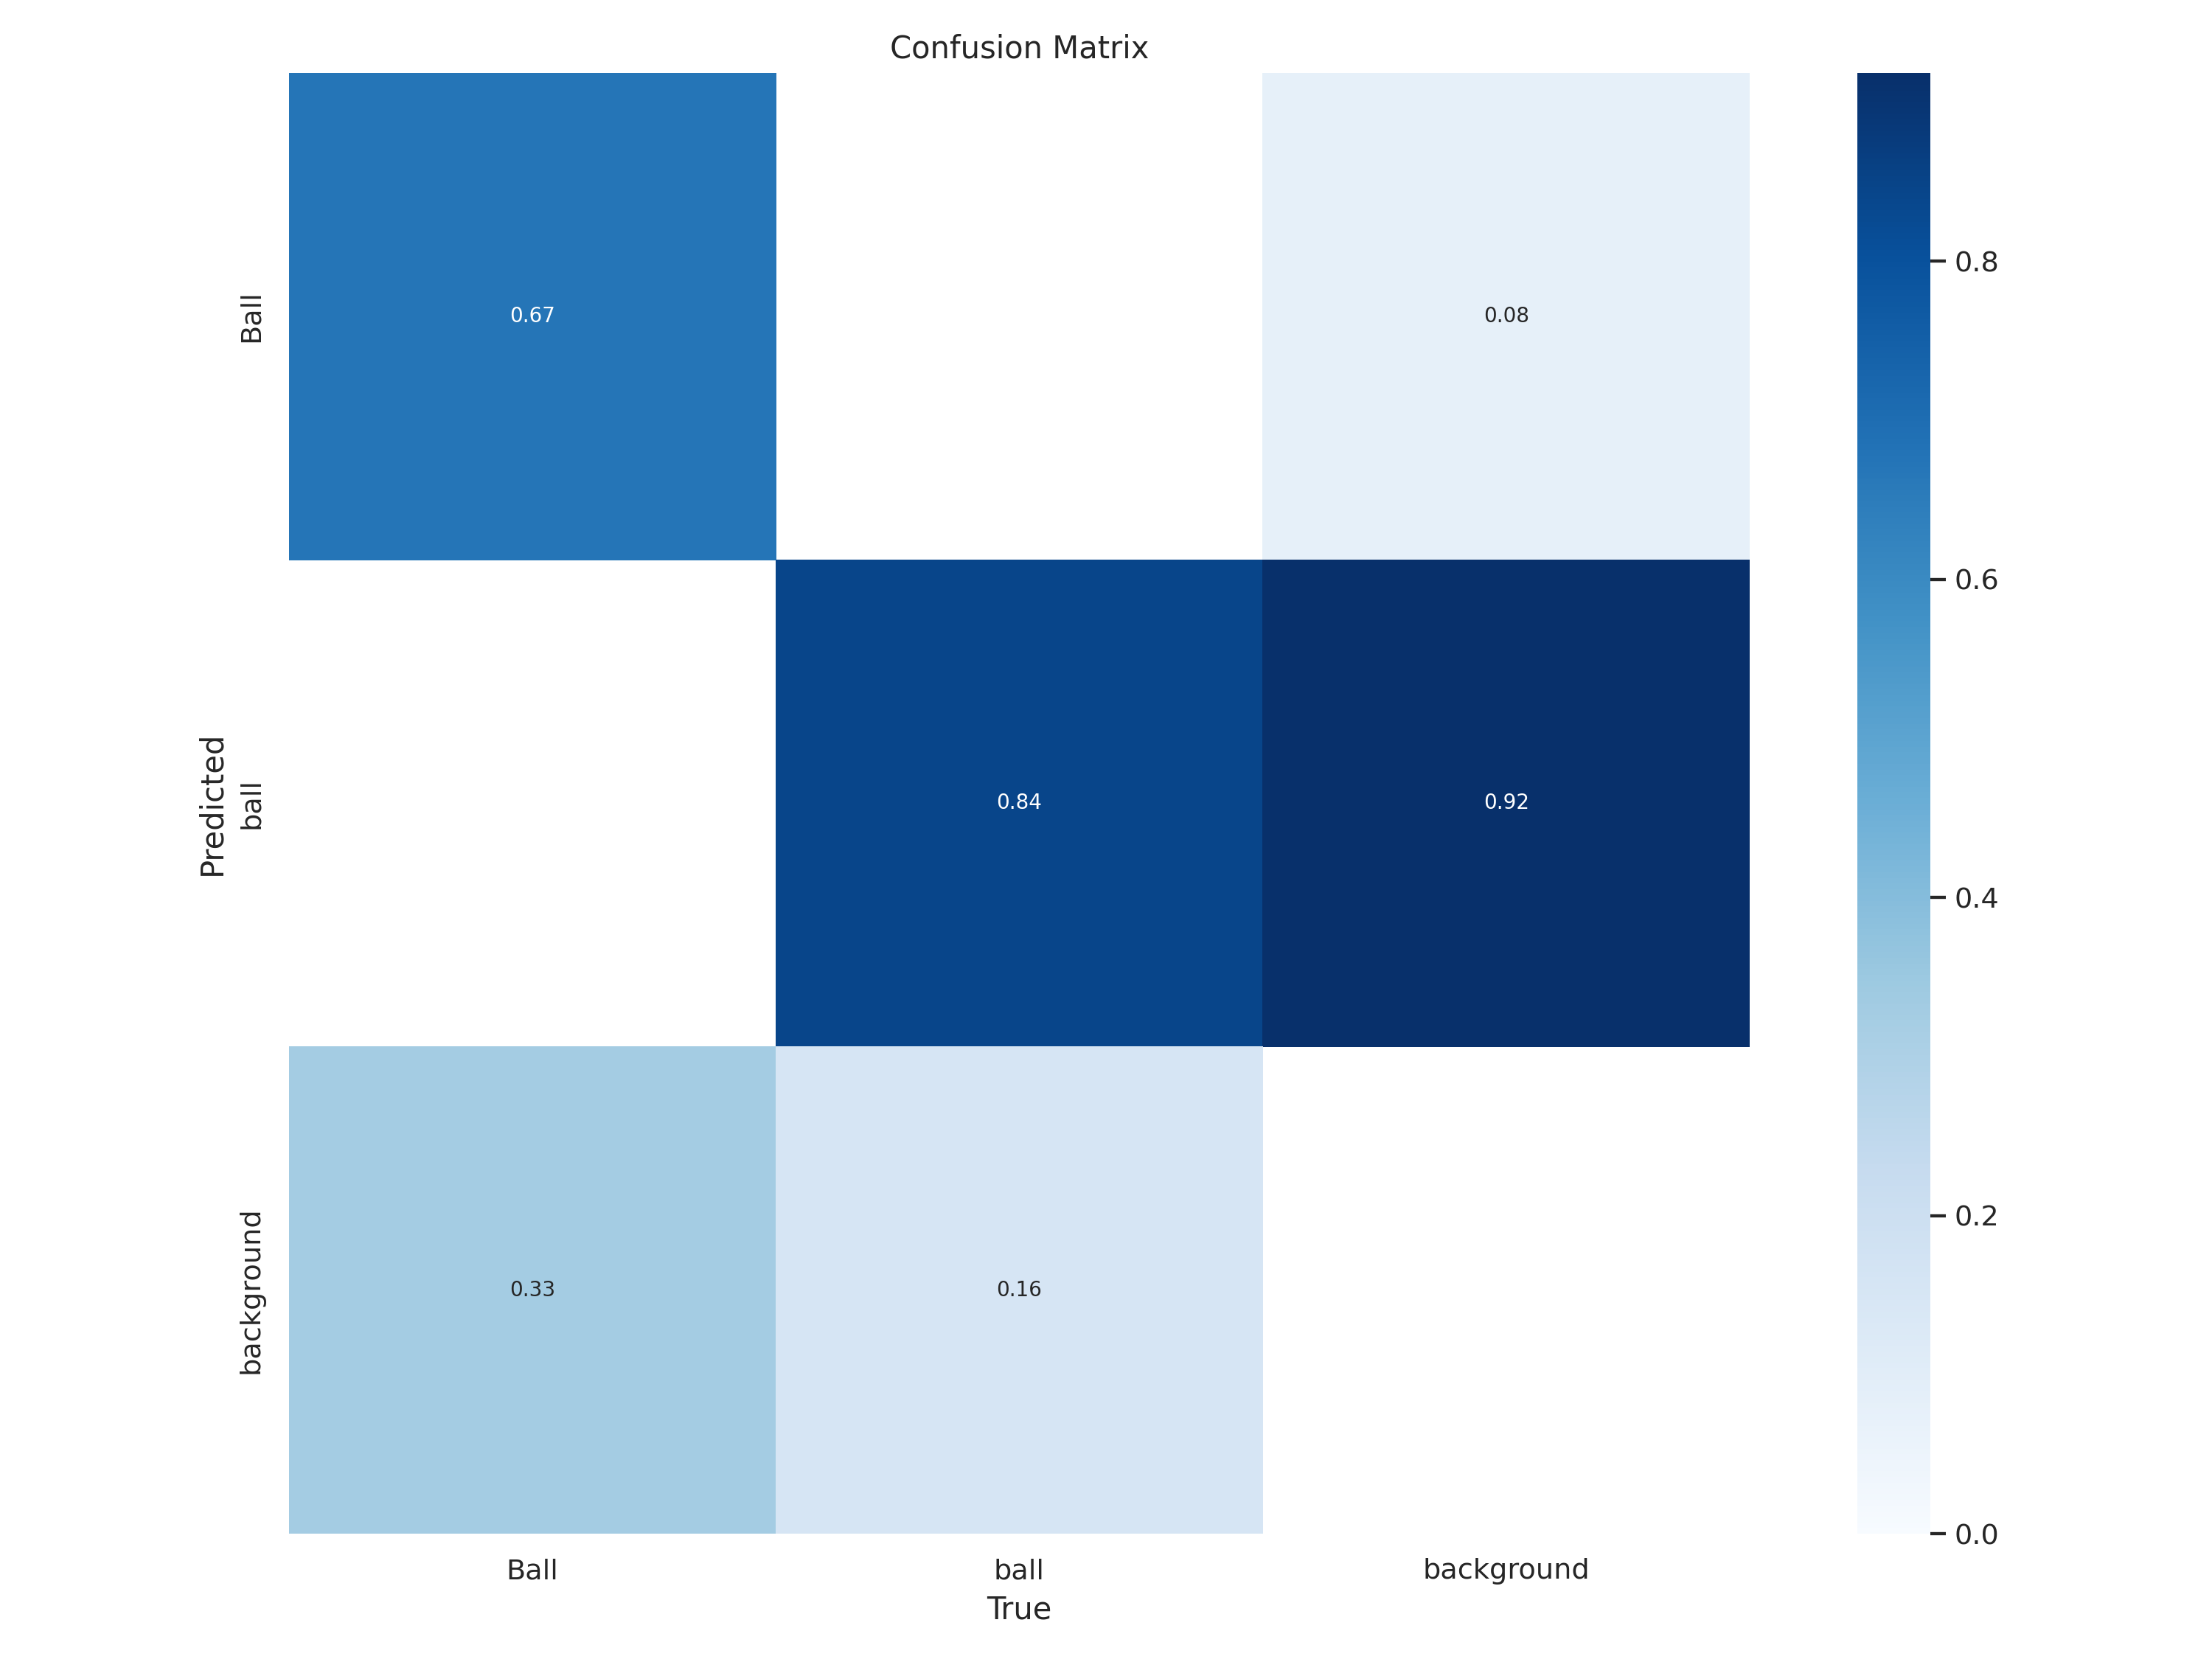

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


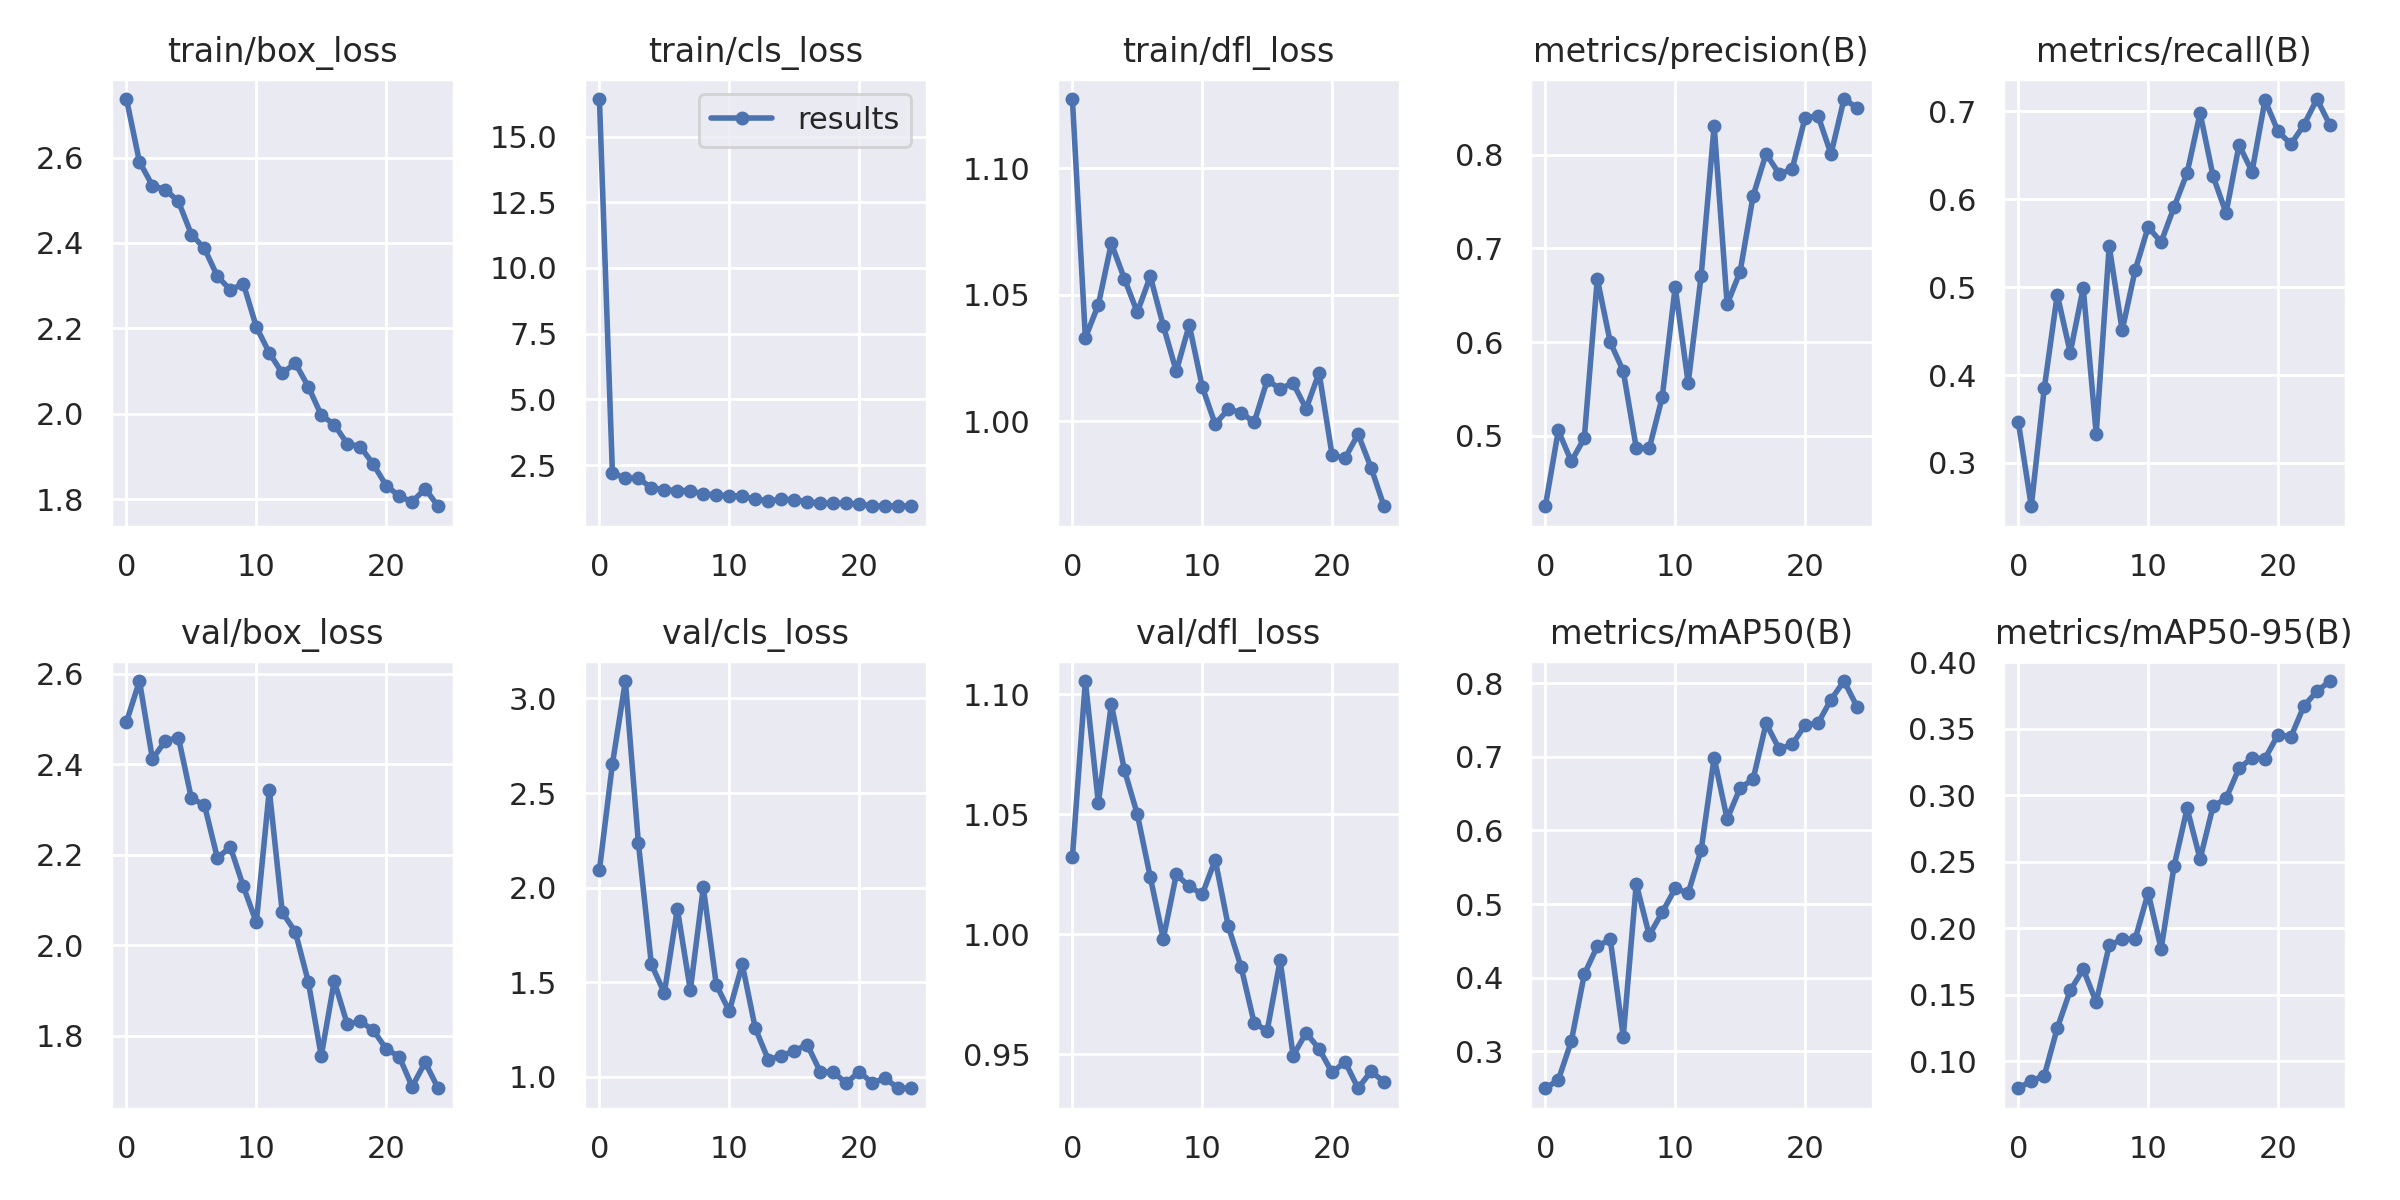

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


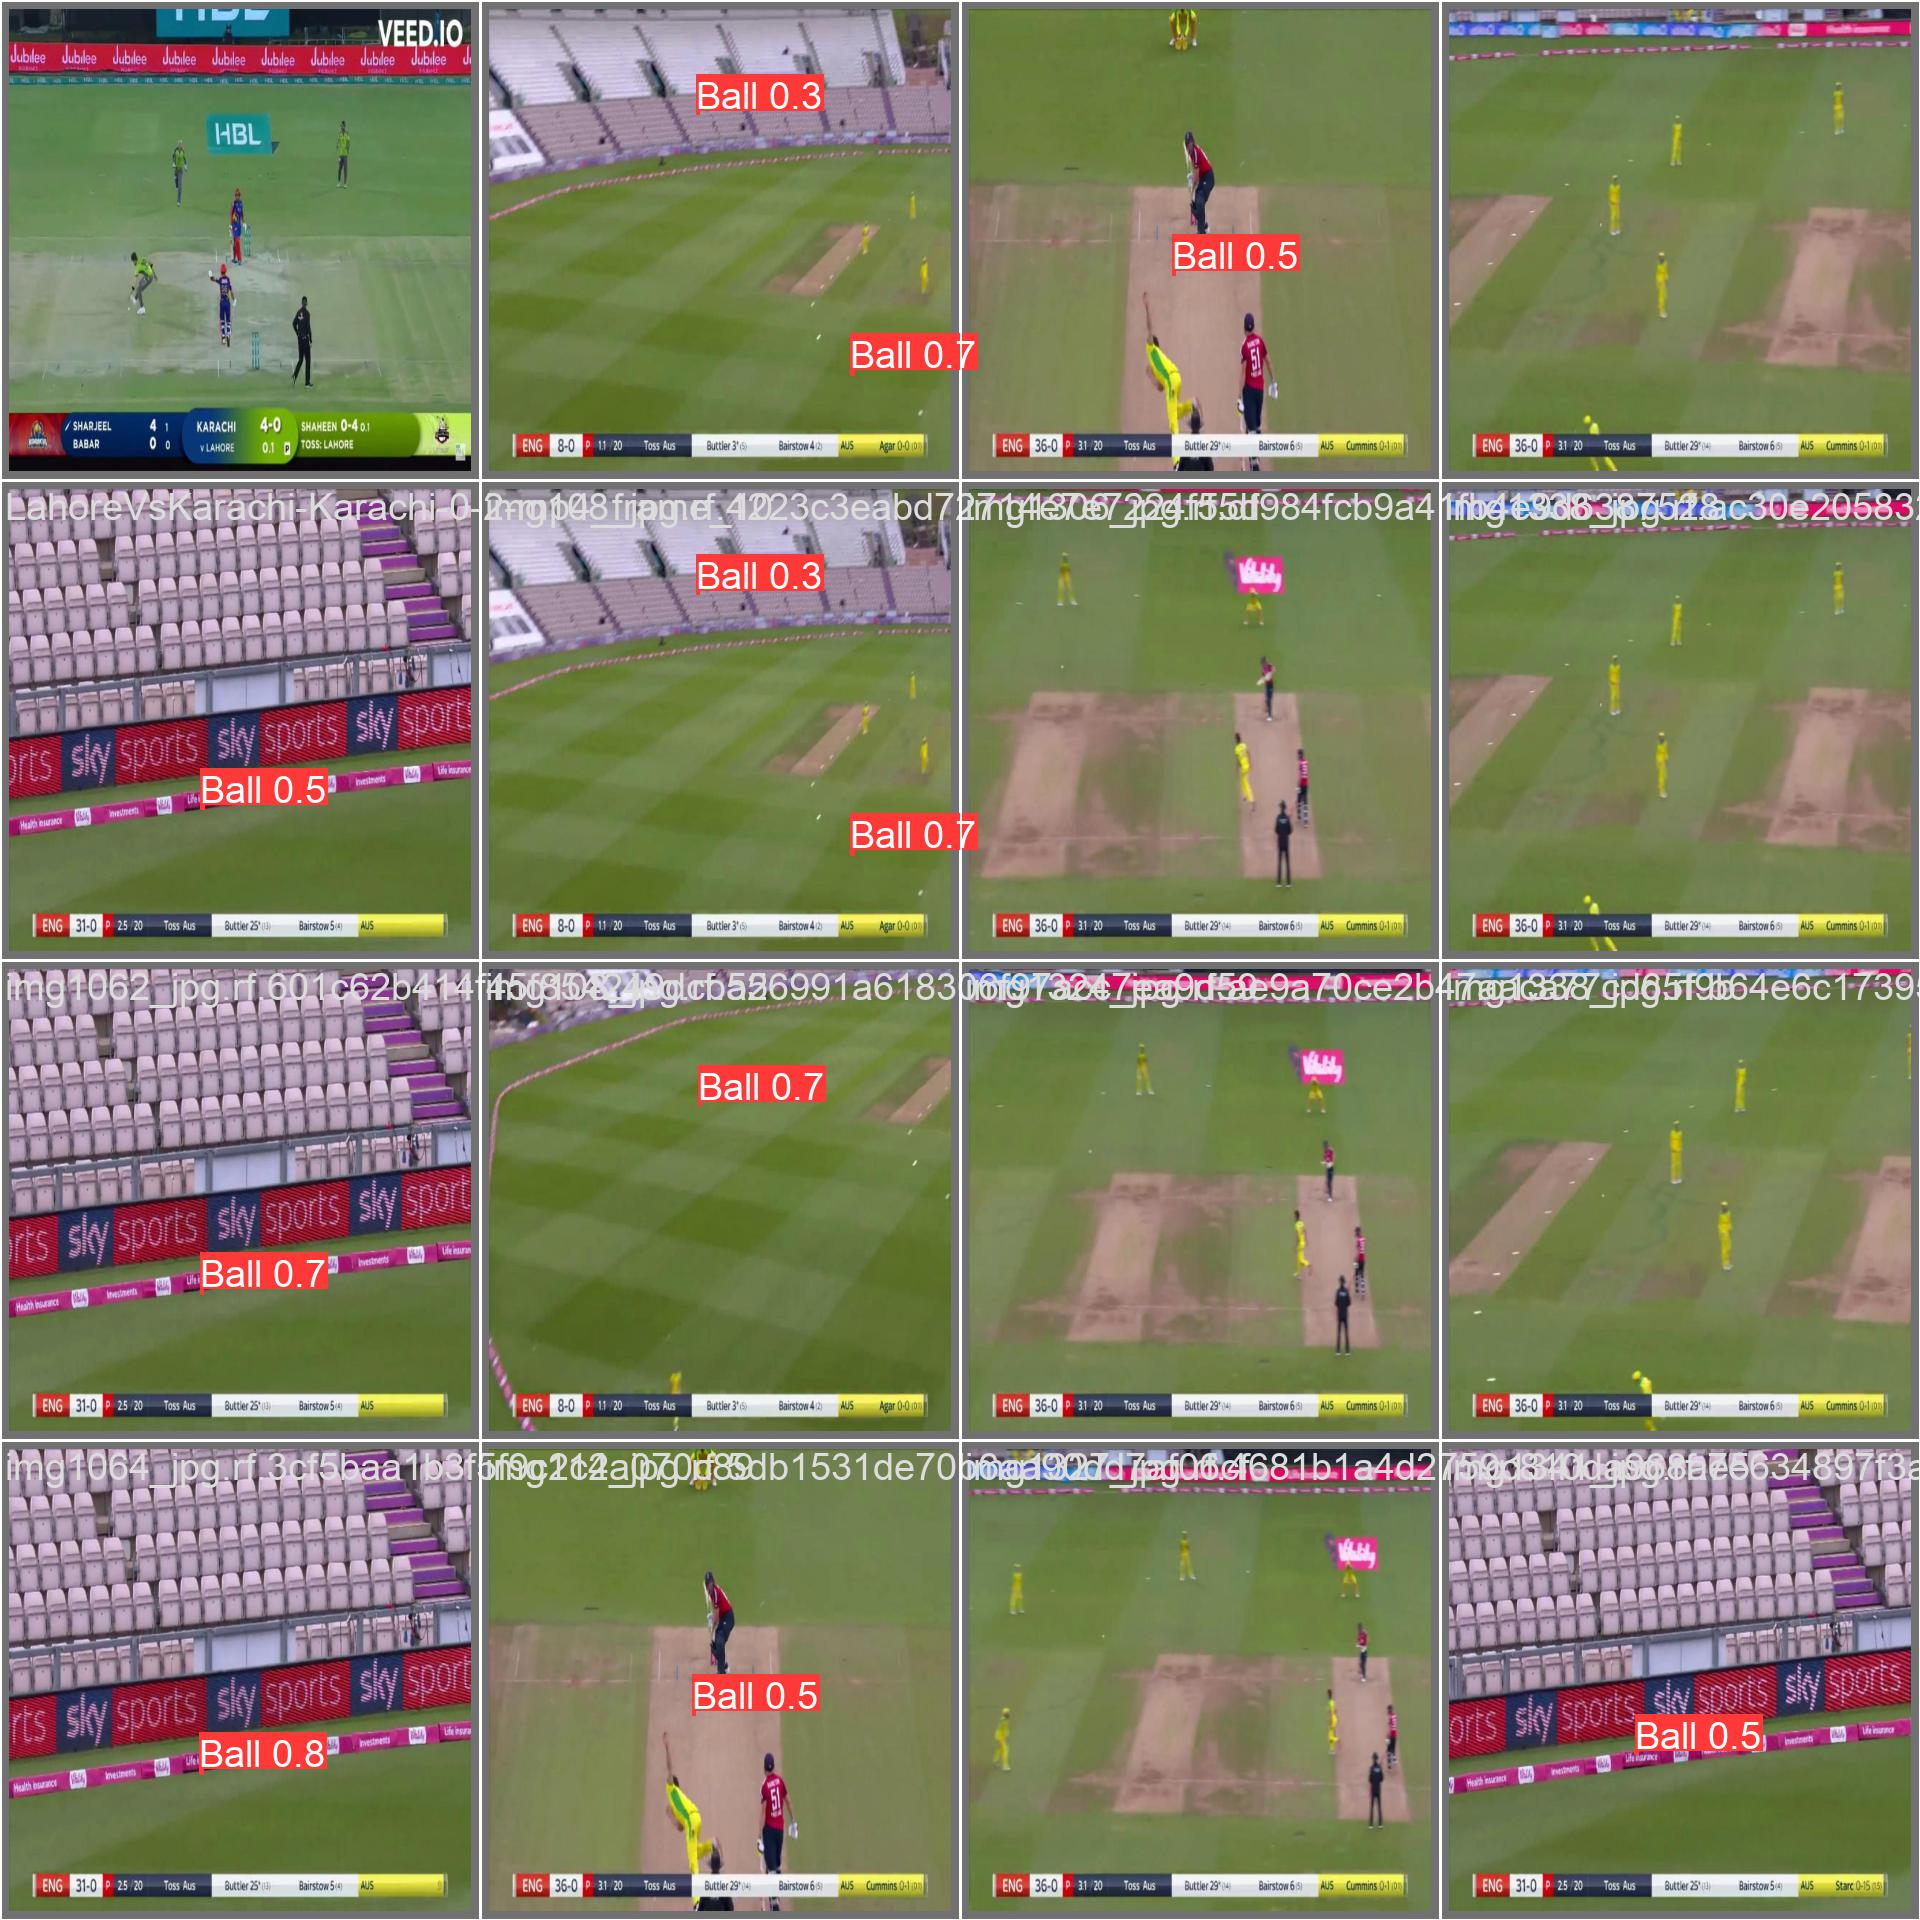

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/PSL-DATASET-2/valid/labels.cache... 273 images, 0 backgrounds, 0 corrupt: 100% 273/273 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:07<00:00,  2.45it/s]
                   all        273        273      0.854      0.681      0.766      0.401
                  Ball        273        119       0.95      0.634      0.812      0.468
                  ball        273        154      0.757      0.727       0.72      0.335
Speed: 3.1ms pre-process, 13.6ms inference, 0.0ms loss, 2.0ms post-process per image


## Inference with Custom Model

In [ ]:
!./darknet/darknet detector test darknet/data/labelled_data1.data darknet/cfg/yolov3_custom.cfg backup/yolov3_custom_final.weights -ext_output > output.txt


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics.yolo.engine.model import YOLO

model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")
results = model.predict(source='/content/laaaaaaaaaaa.jpg') # source already setup

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


 ### Ball Tracking 

In [ ]:
import re
def coordinates(path):
  xmin, ymin, xmax, ymax, w, h=0.00,0.00,0.00,0.00,0.00, 0.00
  max_ci=0
  with open(path, "r") as file:
    for line in file:
        if line.startswith(" + tensor"):
            line = line.strip()
            line=line[line.index("[") + 1 : line.index("]")]
            # print(line)
            abc= line.startswith("[")
            # print(line)
            if abc:
              detections=line.split("]")
            else:
              xmin, ymin, xmax, ymax =0,0,0,0
              break
            for detection in detections:
              if detection.startswith("["):
                  xmin, ymin, xmax, ymax, ci,  _ = map(float, detection[detection.index("[") + 1 : ].split(","))
                  print(xmin, ymin, xmax, ymax, ci)
                  ci=float(ci)
                  if ci>max_ci:
                    continue
                  else:
                    xmin, ymin, xmax, ymax=0
            print(xmin, ymin, xmax, ymax)  
            w = xmax- xmin
            h = ymax-ymin               
  return ( int(xmin), int(ymin), int(w), int(h))


In [ ]:
coordinates('/content/output.txt')


[360.00000, 313.00000, 385.00000, 353.00000,   0.69590,   1.00000]
[360.00000, 313.00000, 385.00000, 353.00000,   0.69590,   1.00000]


In [ ]:
%cd {HOME}
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/datasets/PSL-DATASET-2/test/images/LahoreVsKarachi-Karachi-0-2-mp4_frame_127_jpg.rf.a8e2b761e75dee11d8305bb3e20b84f6.jpg save=True > output.txt


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/drive/MyDrive/datasets/PSL-DATASET-2/test/images/LahoreVsKarachi-Karachi-0-2-mp4_frame_127_jpg.rf.a8e2b761e75dee11d8305bb3e20b84f6.jpg: 800x800 1 ball, 26.1ms
Speed: 0.7ms pre-process, 26.1ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics.yolo.engine.model import YOLO
import time
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")
results = model.predict(source='/content/drive/MyDrive/datasets/PSL-DATASET-2/test/images/LahoreVsKarachi-Karachi-0-2-mp4_frame_127_jpg.rf.a8e2b761e75dee11d8305bb3e20b84f6.jpg')
with open("/content/output.txt","w") as f:
    f.write(str(results))

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics.yolo.engine.model import YOLO
import time
import imageio


# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Load the video file
cap = cv2.VideoCapture("/content/video.mp4")

# Get the frame dimensions
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Video Writer
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (frame_width, frame_height))

# Define the Kalman filter
kf = cv2.KalmanFilter(4, 2)
kf.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kf.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)

# Initialize the state and covariance matrices
kf.statePost = np.array([[0], [0], [0], [0]], np.float32)
kf.errorCovPost = np.array([[10, 0, 0, 0], [0, 10, 0, 0], [0, 0, 10, 0], [0, 0, 0, 10]], np.float32)

# Defining the Model
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

frames=[]

# Loop through the frames
while True:
  # # Read the next frame    
  ret, frame = cap.read()
  if not ret:
    break
  
  #Write each frame as an image 
  cv2.imwrite('/content/pic.jpg',frame)
  # Predicting the model
  results = model.predict(source='/content/pic.jpg')
  # For writting the predicted result
  with open("/content/output.txt","w") as f:
    f.write(str(results))
  # Get the bounding box around the ball    
  path='/content/output.txt'
  
  #Getting the exact coordinates      
  x,y,w,h = coordinates(path)
  
  # Use the Kalman filter to predict the ball's position  
  prediction = kf.predict()
  predicted_x = int(prediction[0][0])
  predicted_y = int(prediction[1][0])
  
  # # Use the bounding box to correct the Kalman filter's prediction    
  measurement = np.array([[x + w / 2], [y + h / 2]], np.float32)
  kf.correct(measurement)
  
  # Draw a bounding box around the ball
  cv2.rectangle(frame, (x, y), (x+w,y+h), (0, 0, 255), 2)
  
  # Display the current frame
  cv2_imshow(frame)
  frames.append(frame)

# Writting the frames in output video
for frame in frames:
    out.write(frame)
out.release()


**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")